### Information
Chat GPT was used in some parts of the notebook, but this was explicitly mentioned in the relevant sections. In addition, the documentation was further optimised with the help of AI.

### Importing Libraries
This part imports all essential libraries for data analysis, visualization, preprocessing, and model training. Pandas and NumPy are used for data manipulation, Matplotlib and Seaborn for visualization, Scikit-learn for data preprocessing and evaluation, and TensorFlow with Keras for building and training neural networks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import tensorflow as tf
import tkinter as tk
from tkinter import messagebox

import keras
from keras import layers
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

### Loading the Dataset
The dataset is loaded from a CSV file named data.csv using pandas. The semicolon is specified as the separator since the file uses “;” instead of a comma to separate values.

In [3]:
df = pd.read_csv("data.csv", sep=";")

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data preprocessing
In this section, the dataset is prepared and cleaned for model training. All data undergo the same preprocessing steps to ensure consistency. GPT was used only to suggest possible mapping strategies for creating new columns, and only the descriptions of the data values (e.g., what the numbers like 1, 2, or 3 represent) were provided so that meaningful columns could be created. No actual data was shared with the AI. The reference code for the data mapping logic was adapted from the following source: https://stackoverflow.com/questions/19913659/how-do-i-create-a-new-column-where-the-values-are-selected-based-on-an-existing

The Marital status column is converted into three new binary columns, single, partnered, and previously_partnered, to simplify categorical data. The original column is then removed.

In [5]:
df["single"] = (df["Marital status"] == 1).astype(int)
df["partnered"] = df["Marital status"].isin([2, 5]).astype(int)
df["prev_partnered"] = df["Marital status"].isin([3, 4, 6]).astype(int)
df = df.drop(columns=["Marital status"])

The Application mode column is mapped into three new binary columns, admission_general, admission_transfer, and admission_special/international. to group different admission types into broader categories. The original column is then removed.

In [6]:
df["admission_general"] = df["Application mode"].isin([1, 17, 18]).astype(int)
df["admission_transfer"] = df["Application mode"].isin([42, 43, 44, 51, 53, 57]).astype(int)
df["admission_special/international"] = df["Application mode"].isin([2, 5, 7, 10, 15, 16, 26, 27, 39]).astype(int)
df = df.drop(columns=["Application mode"])

The Application order column is transformed into a binary column called high_priority, indicating whether the application was among the top three choices. The original column is then removed.

In [7]:
df["high_priority"] = (df["Application order"] <= 3).astype(int)
df = df.drop(columns=["Application order"])

The Course column is mapped into three new binary columns, studyfield_stem, studyfield_business_social, and studyfield_arts&comm, to group study programs into broader academic categories. The original column is then removed.

In [8]:
df["studyfield_stem"] = df["Course"].isin([33, 9119, 9085]).astype(int)
df["studyfield_business_social"] = df["Course"].isin([9147, 9991, 9670, 9254, 8014, 9238, 9853]).astype(int)
df["studyfield_arts&comm"] = df["Course"].isin([171, 9070, 9773, 9130, 9500, 9556]).astype(int)
df = df.drop(columns=["Course"])

The Daytime/evening attendance column is renamed to is_daytime to simplify interpretation of study attendance type. The original column is then removed.

In [9]:
df["is_daytime"] = df["Daytime/evening attendance\t"]
df = df.drop(columns=["Daytime/evening attendance\t"])

The Previous qualification column is mapped into three new binary columns, prevqual_basic, prevqual_secondary, and prevqual_higher, to categorize students by their highest level of prior education. The original column is then removed.

In [10]:
df["prevqual_basic"] = df["Previous qualification"].isin([9, 10, 12, 14, 15, 19, 38]).astype(int)
df["prevqual_secondary"] = df["Previous qualification"].isin([1, 39]).astype(int)
df["prevqual_higher"] = df["Previous qualification"].isin([2, 3, 4, 5, 6, 40, 42, 43]).astype(int)
df = df.drop(columns=["Previous qualification"])

The Nacionality column is mapped into five new binary columns, nationality_europe, nationality_africa, nationality_south_america, nationality_north_america, and nationality_asia, to group students by their continent of origin. The original column is then removed.

In [11]:
df["nationality_europe"] = df["Nacionality"].isin([1, 2, 6, 11, 13, 14, 17, 62, 100, 103, 105]).astype(int)
df["nationality_africa"] = df["Nacionality"].isin([21, 22, 24, 25, 26]).astype(int)
df["nationality_south_america"] = df["Nacionality"].isin([41, 109]).astype(int)
df["nationality_north_america"] = df["Nacionality"].isin([101, 108]).astype(int)
df["nationality_asia"] = df["Nacionality"].isin([32]).astype(int)

df = df.drop(columns=["Nacionality"])

The Mother's qualification column is mapped into three new binary columns, mother_qualification_basic, mother_qualification_secondary, and mother_qualification_higher, to classify the mother's highest education level. The original column is then removed.

In [12]:
df["mother_qualification_basic"] = df["Mother's qualification"].isin([9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 35, 36, 37, 38]).astype(int)
df["mother_qualification_secondary"] = df["Mother's qualification"].isin([1, 39]).astype(int)
df["mother_qualification_higher"] = df["Mother's qualification"].isin([2, 3, 4, 5, 6, 40, 41, 42, 43, 44]).astype(int)
df = df.drop(columns=["Mother's qualification"])

The Father's qualification column is mapped into three new binary columns, father_qualification_basic, father_qualification_secondary, and father_qualification_higher, to categorize the father's highest level of education. The original column is then removed

In [13]:
df["father_qualification_basic"] = df["Father's qualification"].isin([9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 35, 36, 37, 38]).astype(int)
df["father_qualification_secondary"] = df["Father's qualification"].isin([1, 39]).astype(int)
df["father_qualification_higher"] = df["Father's qualification"].isin([2, 3, 4, 5, 6, 40, 41, 42, 43, 44]).astype(int)
df = df.drop(columns=["Father's qualification"])

The Mother's occupation column is mapped into four new binary columns, mother_occ_academic, mother_occ_technical_admin, mother_occ_service_manual, and mother_occ_unskilled_other, to group occupations by type and skill level. The original column is then removed.

In [14]:
df["mother_occ_academic"] = df["Mother's occupation"].isin([1, 2, 122, 123, 125]).astype(int)
df["mother_occ_technical_admin"] = df["Mother's occupation"].isin([3, 4, 131, 132, 134, 141, 143, 144]).astype(int)
df["mother_occ_service_manual"] = df["Mother's occupation"].isin([5, 6, 7, 8, 151, 152, 153, 171, 173, 175, 194]).astype(int)
df["mother_occ_unskilled_other"] = df["Mother's occupation"].isin([0, 9, 10, 90, 99, 191, 192, 193]).astype(int)
df = df.drop(columns=["Mother's occupation"])


The Father's occupation column is mapped into four new binary columns, father_occ_academic, father_occ_technical_admin, father_occ_service_manual, and father_occ_unskilled_other, to categorize occupations by type and skill level. The original column is then removed.

In [15]:
df["father_occ_academic"] = df["Father's occupation"].isin([1, 2, 101, 102, 103, 112, 114, 121, 122, 123, 124, 135]).astype(int)
df["father_occ_technical_admin"] = df["Father's occupation"].isin([3, 4, 131, 132, 134, 141, 143, 144]).astype(int)
df["father_occ_service_manual"] = df["Father's occupation"].isin([5, 6, 7, 8, 151, 152, 153, 154, 161, 163, 171, 172, 174, 175, 181, 182, 183, 194, 195]).astype(int)
df["father_occ_unskilled_other"] = df["Father's occupation"].isin([0, 9, 10, 90, 99, 192, 193]).astype(int)
df = df.drop(columns=["Father's occupation"])

A new column, avg_grade, is created by calculating the average of the grades from the first and second semesters. This provides a single metric representing each student’s overall academic performance.

In [16]:
df["avg_grade"] = ((df["Curricular units 1st sem (grade)"] + df["Curricular units 2nd sem (grade)"]) / 2)

The success_rate column is created by dividing the total number of approved curricular units by the total number of enrolled units across both semesters, rounded to two decimal places. This represents each student’s academic success ratio.

In [17]:
df["success_rate"] = (((df["Curricular units 1st sem (approved)"] + df["Curricular units 2nd sem (approved)"]) /(df["Curricular units 1st sem (enrolled)"] + df["Curricular units 2nd sem (enrolled)"])).round(2))

The total_enrolled column is created by summing the number of curricular units a student was enrolled in during the first and second semesters, providing the total course load for the academic year.

In [18]:

df["total_enrolled"] = (df["Curricular units 1st sem (enrolled)"] + df["Curricular units 2nd sem (enrolled)"])

The no_evaluation_total column is created by adding the number of curricular units without evaluations from both semesters, indicating how many enrolled courses were not assessed overall.

In [19]:

df["no_evaluation_total"] = (df["Curricular units 1st sem (without evaluations)"] + df["Curricular units 2nd sem (without evaluations)"])

After deriving summary features such as avg_grade, success_rate, total_enrolled, and no_evaluation_total, all original semester-specific columns are removed to simplify the dataset and avoid redundancy.

In [20]:
df = df.drop(columns=[
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
])

### Target Variable Encoding
The Target column is converted into a numerical column called prediction, where categorical outcomes are mapped as follows: Dropout = 0, Enrolled = 1, and Graduate = 2. The original Target column is then removed.

In [21]:
df['prediction'] = df['Target'].replace({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})
df = df.drop(columns=['Target'])

C:\Users\Mani\AppData\Local\Temp\ipykernel_4636\4092551096.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['prediction'] = df['Target'].replace({


### Target Distribution Check

This command displays the frequency of each class within the prediction column, allowing verification of how many students belong to each outcome category (Dropout, Enrolled, Graduate).

In [22]:
df['prediction'].value_counts()

prediction
2    2209
0    1421
1     794
Name: count, dtype: int64

### Missing Values Check

All numerical columns, except involves_counterfeit, are selected to check for missing values. The code prints the number of missing entries per column and the total number of missing values across the dataset, helping identify data completeness issues before model training.

In [23]:
num_cols = df.select_dtypes(include=[np.number]).columns.difference(["involves_counterfeit"])

print(df[num_cols].isna().sum())

print("\nTotal missing values:", df[num_cols].isna().sum().sum())


Admission grade                      0
Age at enrollment                    0
Debtor                               0
Displaced                            0
Educational special needs            0
GDP                                  0
Gender                               0
Inflation rate                       0
International                        0
Previous qualification (grade)       0
Scholarship holder                   0
Tuition fees up to date              0
Unemployment rate                    0
admission_general                    0
admission_special/international      0
admission_transfer                   0
avg_grade                            0
father_occ_academic                  0
father_occ_service_manual            0
father_occ_technical_admin           0
father_occ_unskilled_other           0
father_qualification_basic           0
father_qualification_higher          0
father_qualification_secondary       0
high_priority                        0
is_daytime               

### Handling Missing Values

The check revealed 180 missing values in the success_rate column. These likely correspond to students who did not complete their studies, resulting in missing academic performance data for those cases.

In [24]:
df.isna().sum()[df.isna().sum() > 0]

success_rate    180
dtype: int64

### Filling Missing Success Rates

Missing values in the success_rate column are filled with 0. This approach retains students who did not complete their studies, allowing the model to learn from these cases instead of excluding them from the training data.

In [25]:
df["success_rate"] = df["success_rate"].fillna(0)


### Duplicate Check and Removal

The datast is checked for duplicat rows to ensure data integrity. Any duplicated founrd are displayed, then removed, and the index is reset. Thes step prevents redundant records from biasing the model or affecting statistical analysis.

In [26]:
duplicates_count = df.duplicated().sum()
print("Number of duplicates:", duplicates_count)

if duplicates_count > 0:
    display(df[df.duplicated()])

df = df.drop_duplicates().reset_index(drop=True)
print("After dropping duplicates:", df.duplicated().sum())


Number of duplicates: 0
After dropping duplicates: 0


### Feature and Target Preparation

The dataset is split into features (X) and target (prediction). The target values are label-encoded into numerical form using LabelEncoder and then one-hot encoded for use in a neural network. The variable categories stores the class labels (Dropout, Enrolled, Graduate) for reference. This code for the correlation matrix was used from the teaching notebook 

In [27]:
X = df.drop('prediction', axis=1)

y_temp = df['prediction']

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)

categories = list(le.classes_)
categories

[0, 1, 2]

### Correlation Analysis

A correlation matrix was computed to examine how each variable relates to the prediction (student outcome). The strongest positive correlations were found with success_rate (0.69), avg_grade (0.55), and Tuition fees up to date (0.41), indicating these factors are highly associated with academic success. Negative correlations, such as Debtor (-0.24) and Age at enrollment (-0.24), suggest that financial or demographic factors may increase the likelihood of dropout. This code for the correlation matrix was used from the teaching notebook

In [28]:
corr_matrix = df.corr()['prediction']
corr_matrix.sort_values(ascending=False)

prediction                         1.000000
success_rate                       0.686626
avg_grade                          0.550356
Tuition fees up to date            0.409827
Scholarship holder                 0.297595
admission_general                  0.237744
total_enrolled                     0.167721
prevqual_secondary                 0.152671
studyfield_arts&comm               0.142211
Admission grade                    0.120889
Displaced                          0.113986
single                             0.106408
Previous qualification (grade)     0.103764
is_daytime                         0.075107
father_occ_service_manual          0.067865
father_qualification_basic         0.059223
GDP                                0.044135
mother_qualification_secondary     0.042204
mother_occ_service_manual          0.031607
mother_occ_technical_admin         0.030684
nationality_africa                 0.021495
mother_qualification_basic         0.014602
Unemployment rate               

### Chi-Square Feature Importance Results

The Chi-Square test identified the most influential features for predicting student outcomes. The highest-scoring variables are avg_grade (3016.44), success_rate (820.68), and Age at enrollment (715.98), indicating that academic performance and demographic factors play key roles in determining success. Features with lower scores, such as nationality_europe or father_occ_technical_admin, have minimal statistical impact on the target variable. This code for the correlation matrix was used from the teaching notebook

In [29]:
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
46,avg_grade,3016.44
47,success_rate,820.68
8,Age at enrollment,715.98
7,Scholarship holder,308.11
4,Debtor,229.85
48,total_enrolled,226.82
49,no_evaluation_total,224.81
18,admission_special/international,203.51
6,Gender,151.22
1,Admission grade,112.25


After performing correlation analysis, the Chi-Square test, and an additional like Phik correlation test, no variables were removed from the dataset. Several combinations were tested to eliminate less relevant features, but in every case, the model’s performance decreased compared to using the full feature set. Therefore, all variables were retained for training. 

### Data Splitting

The dataset was split into 70% training, 15% validation, and 15% testing using train_test_split().
This ensures that the model is trained, tuned, and evaluated on separate data subsets for reliable performance.
This code for the correlation matrix was used from the teaching notebook.

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Model Architecture and Training Setup

A Keras neural network was built for multiclass classification, using Batch Normalization, Dense ReLU layers with L1 regularization and Dropout, and a Softmax output layer.
It was compiled with the Adam optimizer and categorical cross-entropy loss, using accuracy as the metric.
This code was adapted from the teaching notebook.


In [31]:
variable_amount = X_train.shape[1]

mc = ModelCheckpoint("best_model_student.keras", monitor="val_loss", mode="min", save_best_only=True)
es = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=7, min_lr=1e-6, verbose=1)
callbacks_opt = [mc, es, rlr]

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dropout(0.1),
        layers.Dense(18, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Mani\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           594 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            57 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,483 (9.70 KB)

 Trainable params: 2,383 (9.31 KB)

 Non-trainable params: 100 (400.00 B)

### Model Training

The model was trained for up to 2000 epochs using the training set with validation on the validation set to monitor performance.
Callbacks (callbacks_opt) were applied to automatically save the best model, stop early when no improvement occurs, and adjust the learning rate dynamically.
This setup helps achieve optimal accuracy while preventing overfitting and unnecessary training time.
This code was used from the previous exercise.

In [32]:
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=2000,callbacks=callbacks_opt, verbose=1)

Epoch 1/2000
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5439 - loss: 15.4971 - val_accuracy: 0.4789 - val_loss: 9.6821 - learning_rate: 0.0010
Epoch 2/2000
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5982 - loss: 5.7424 - val_accuracy: 0.5572 - val_loss: 2.7225 - learning_rate: 0.0010
Epoch 3/2000
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6486 - loss: 1.4553 - val_accuracy: 0.6506 - val_loss: 0.9492 - learning_rate: 0.0010
Epoch 4/2000
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6906 - loss: 0.8989 - val_accuracy: 0.7123 - val_loss: 0.8642 - learning_rate: 0.0010
Epoch 5/2000
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7158 - loss: 0.8474 - val_accuracy: 0.7244 - val_loss: 0.8226 - learning_rate: 0.0010
Epoch 6/2000
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7190 - loss: 0.8284 - val_accuracy: 0.7259 - val_loss: 0.8132 - learning_rate: 0.0010
Epoch 7/2000
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7213 - loss: 0.8091 -

### Training Performance

The training and validation loss curves show a rapid decrease within the first few epochs, after which both losses stabilize at a low level.
This indicates that the model converged quickly and achieved good generalization, as the validation loss closely follows the training loss without signs of overfitting. This code was used from the exercise notebook.

<Axes: >

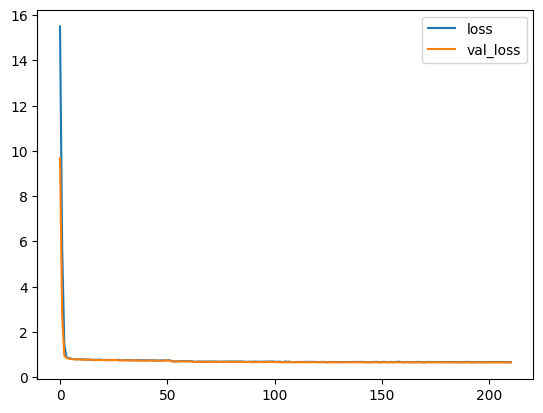

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

### Model Accuracy

The training and validation accuracy both increase rapidly during the first few epochs and then stabilize around 0.74–0.75.
The close alignment of both curves indicates that the model learns effectively without overfitting and maintains consistent performance on unseen data. This code was used from the exercise notebook.

<Axes: >

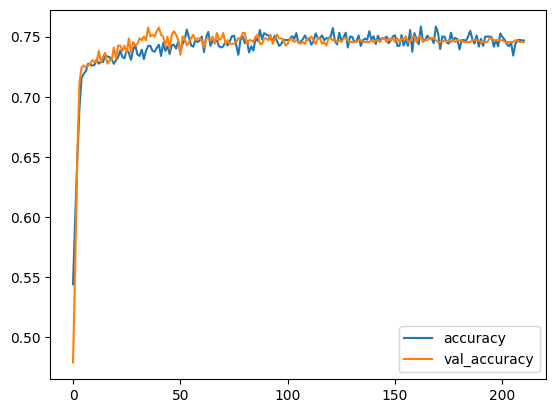

In [34]:
loss_df[['accuracy', 'val_accuracy']].plot()


### Model Evaluation

The model achieved an accuracy of 0.76 on both training and test data, with a loss of around 0.64.
This indicates good generalization and no signs of overfitting.
This evaluation was performed using code adapted from the exercise notebook.

In [35]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.6407343745231628, 0.759036123752594]

Train data evaluation:
[0.6328875422477722, 0.7661498785018921]


In [36]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

y_test = np.argmax(y_test, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [37]:
categories = ["Dropout", "Enrolled", "Graduate"]

### Confusion Matrix

The confusion matrix shows that the model correctly classified most instances across the two main categories (Dropout and Graduate).
The highest accuracy is observed in the Graduate class, while some misclassifications occur between Dropout and Enrolled.
The Enrolled category shows the highest level of misclassification.This code was used from the exercise notebook.

<Axes: >

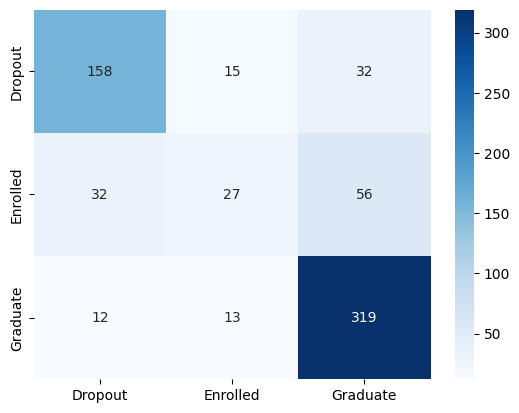

In [38]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories, cmap="Blues")


### Logistic Regression Results

The Logistic Regression model achieved an overall accuracy of 75.9%.
It performed best for the Graduate class (precision = 0.78, recall = 0.93, F1 = 0.85), while the Enrolled class showed weaker recall (0.23), indicating some misclassifications.
Overall, the model performs reasonably well, especially in distinguishing Dropout and Graduate students.

In [39]:
print(classification_report(y_test, test_predictions, target_names=categories))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

     Dropout       0.78      0.77      0.78       205
    Enrolled       0.49      0.23      0.32       115
    Graduate       0.78      0.93      0.85       344

    accuracy                           0.76       664
   macro avg       0.69      0.64      0.65       664
weighted avg       0.73      0.76      0.73       664


Model overall accuracy: 75.90%


### ROC-AUC Result
The model achieved a ROC-AUC score of 0.87, indicating a strong ability to distinguish between the three target classes (Dropout, Enrolled, Graduate).

In [40]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.8740267495110974

### Logistic Regression
The Logistic Regression implementation used in this project is based on following source: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_logistic.py. GPT was used to assist in optimizing and simplifying the code structure. The outcomes generated with GPT-guided optimization were validated through reproducible scikit-learn methods, which confirms that the reported accuracy and ROC-AUC values are reliable and based on standard, verifiable computations.

In [41]:
y_train, y_test = map(lambda y: np.argmax(y, axis=1) if y.ndim > 1 else y, [y_train, y_test])

scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

test_pred = log_reg.predict(X_test)
test_probs = log_reg.predict_proba(X_test)

In [43]:
acc = accuracy_score(y_test, test_pred)
roc_auc = roc_auc_score(y_test, test_probs, multi_class='ovr')


Model Overall Accuracy: 0.7590
ROC-AUC: 0.8603

              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       205
    Enrolled       0.52      0.29      0.37       115
    Graduate       0.77      0.91      0.84       344

    accuracy                           0.76       664
   macro avg       0.70      0.66      0.66       664
weighted avg       0.74      0.76      0.74       664



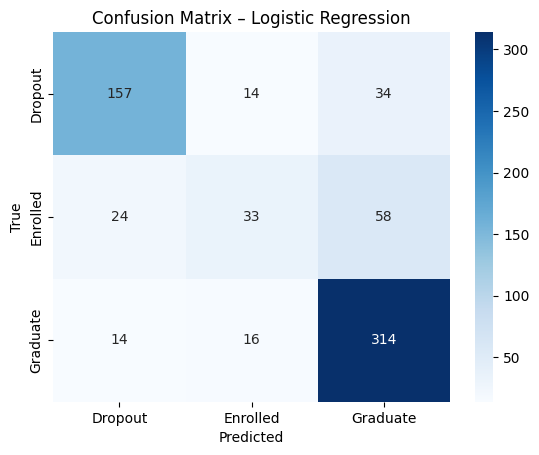

In [44]:
print(f"Model Overall Accuracy: {acc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")
print(classification_report(y_test, test_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))

sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='g', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

### Model Comparison: Neural Network vs. Logistic Regression

The Neural Network achieved an overall accuracy of 75.9% and a ROC-AUC of 0.87, indicating strong ability to capture non-linear relationships.
The Logistic Regression model reached a similar accuracy of 75.9% with a ROC-AUC of 0.86. Despite its simpler structure, it performed nearly as well, suggesting that much of the data is linearly separable.

Overall, both models performed comparably, Logistic Regression trained faster and achieved slightly better class precision, while the Neural Network provided slightly better class separation according to the ROC-AUC score.

In [45]:
X.columns

Index(['Previous qualification (grade)', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Unemployment rate', 'Inflation rate', 'GDP', 'single', 'partnered',
       'prev_partnered', 'admission_general', 'admission_transfer',
       'admission_special/international', 'high_priority', 'studyfield_stem',
       'studyfield_business_social', 'studyfield_arts&comm', 'is_daytime',
       'prevqual_basic', 'prevqual_secondary', 'prevqual_higher',
       'nationality_europe', 'nationality_africa', 'nationality_south_america',
       'nationality_north_america', 'nationality_asia',
       'mother_qualification_basic', 'mother_qualification_secondary',
       'mother_qualification_higher', 'father_qualification_basic',
       'father_qualification_secondary', 'father_qualification_higher',
       'mother_occ_academic', 'mother_occ_technical_admin',
       

### Prediction Example

To test the model, a single example student profile was created with features such as grades, demographics, and socioeconomic background.
The trained model was used to predict the most likely outcome (Dropout, Enrolled, or Graduate) and the associated class probabilities. 

In [46]:
tester_row = {
    "Previous qualification (grade)": 150.0,
    "Admission grade": 140.0,
    "Displaced": 0,
    "Educational special needs": 0,
    "Debtor": 0,
    "Tuition fees up to date": 1,
    "Gender": 1,
    "Scholarship holder": 0,
    "Age at enrollment": 20,
    "International": 0,
    "Unemployment rate": 5.2,
    "Inflation rate": 1.2,
    "GDP": 2.3,
    "single": 1,
    "partnered": 0,
    "prev_partnered": 0,
    "admission_general": 1,
    "admission_transfer": 0,
    "admission_special/international": 0,
    "high_priority": 0,
    "studyfield_stem": 1,
    "studyfield_business_social": 0,
    "studyfield_arts&comm": 0,
    "is_daytime": 1,
    "prevqual_basic": 1,
    "prevqual_secondary": 0,
    "prevqual_higher": 0,
    "nationality_europe": 1,
    "nationality_africa": 0,
    "nationality_south_america": 0,
    "nationality_north_america": 0,
    "nationality_asia": 0,
    "mother_qualification_basic": 0,
    "mother_qualification_secondary": 1,
    "mother_qualification_higher": 0,
    "father_qualification_basic": 0,
    "father_qualification_secondary": 0,
    "father_qualification_higher": 1,
    "mother_occ_academic": 0,
    "mother_occ_technical_admin": 1,
    "mother_occ_service_manual": 0,
    "mother_occ_unskilled_other": 0,
    "father_occ_academic": 0,
    "father_occ_technical_admin": 0,
    "father_occ_service_manual": 0,
    "father_occ_unskilled_other": 1,
    "avg_grade": 14.5,
    "success_rate": 0.8,
    "total_enrolled": 11,
    "no_evaluation_total": 0
}

tester_row = pd.DataFrame([tester_row])

result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

np.set_printoptions(precision=9, suppress=True)

print(f"Predicted outcome: {result_text}\n")
print("Probabilities by class:")
print(categories)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted outcome: Graduate

Probabilities by class:
['Dropout', 'Enrolled', 'Graduate']
[0.17164235 0.35911682 0.46924078]


### Student Outcome GUI

For demonstration purposes, a simple GUI was implemented using Tkinter.
The interface allows users to input student-related features (with default example values provided) and receive a predicted student outcome (Dropout, Enrolled, or Graduate) directly from the trained model.

This GUI code was generated entirely by GPT, as I had not previously worked with Tkinter and wanted a quick and simple way to build an interface for testing predictions.
The correctness was verified by ensuring that all model input features are included in the GUI and that the predicted class output matches the model’s expected format.

In [47]:
model = load_model("best_model_student.keras")

default_values = {
    "Previous qualification (grade)": 150.0,
    "Admission grade": 140.0,
    "Displaced": 0,
    "Educational special needs": 0,
    "Debtor": 0,
    "Tuition fees up to date": 1,
    "Gender": 1,
    "Scholarship holder": 0,
    "Age at enrollment": 20,
    "International": 0,
    "Unemployment rate": 5.2,
    "Inflation rate": 1.2,
    "GDP": 2.3,
    "single": 1,
    "partnered": 0,
    "prev_partnered": 0,
    "admission_general": 1,
    "admission_transfer": 0,
    "admission_special/international": 0,
    "high_priority": 0,
    "studyfield_stem": 1,
    "studyfield_business_social": 0,
    "studyfield_arts&comm": 0,
    "is_daytime": 1,
    "prevqual_basic": 1,
    "prevqual_secondary": 0,
    "prevqual_higher": 0,
    "nationality_europe": 1,
    "nationality_africa": 0,
    "nationality_south_america": 0,
    "nationality_north_america": 0,
    "nationality_asia": 0,
    "mother_qualification_basic": 0,
    "mother_qualification_secondary": 1,
    "mother_qualification_higher": 0,
    "father_qualification_basic": 0,
    "father_qualification_secondary": 0,
    "father_qualification_higher": 1,
    "mother_occ_academic": 0,
    "mother_occ_technical_admin": 1,
    "mother_occ_service_manual": 0,
    "mother_occ_unskilled_other": 0,
    "father_occ_academic": 0,
    "father_occ_technical_admin": 0,
    "father_occ_service_manual": 0,
    "father_occ_unskilled_other": 1,
    "avg_grade": 14.5,
    "success_rate": 0.8,
    "total_enrolled": 11,
    "no_evaluation_total": 0
}

def predict():
    try:
        data = {f: float(entries[f].get()) for f in default_values.keys()}
        df = pd.DataFrame([data])
        pred = model.predict(df, verbose=0)[0]
        result_text = f"Predicted outcome probabilities:\nDropout: {pred[0]:.2f}, Enrolled: {pred[1]:.2f}, Graduate: {pred[2]:.2f}"
        result_label.config(text=result_text)
    except Exception as e:
        messagebox.showerror("Error", str(e))

root = tk.Tk()
root.title("Student Success Predictor")
root.geometry("600x700")

main_frame = tk.Frame(root)
main_frame.pack(fill=tk.BOTH, expand=1)

canvas = tk.Canvas(main_frame)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

scrollbar = tk.Scrollbar(main_frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

canvas.configure(yscrollcommand=scrollbar.set)
canvas.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

frame_inside = tk.Frame(canvas)
canvas.create_window((0, 0), window=frame_inside, anchor="nw")

entries = {}

for f, example in default_values.items():
    row = tk.Frame(frame_inside)
    lab = tk.Label(row, width=28, text=f+": ", anchor="w")
    ent = tk.Entry(row)
    ent.insert(0, str(example))
    hint = tk.Label(row, width=12, text=f"(e.g. {example})", anchor="w", fg="grey")

    row.pack(side=tk.TOP, fill=tk.X, padx=5, pady=2)
    lab.pack(side=tk.LEFT)
    ent.pack(side=tk.LEFT, expand=tk.YES, fill=tk.X)
    hint.pack(side=tk.RIGHT)

    entries[f] = ent

predict_button = tk.Button(frame_inside, text="Predict", command=predict, bg="#4CAF50", fg="white", font=("Helvetica", 10, "bold"))
predict_button.pack(pady=10)

result_label = tk.Label(frame_inside, text="Prediction will appear here", font=("Helvetica", 12), wraplength=500, justify="left")
result_label.pack(pady=10)

def _on_mouse_wheel(event):
    canvas.yview_scroll(int(-1 * (event.delta / 120)), "units")

canvas.bind_all("<MouseWheel>", _on_mouse_wheel)

root.mainloop()
